3.6.5 |Anaconda, Inc.| (default, Mar 29 2018, 13:32:41) [MSC v.1900 64 bit (AMD64)]
Feature Lengths 415 284
Good Length:  28


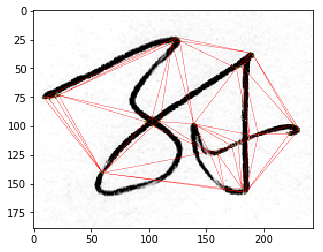

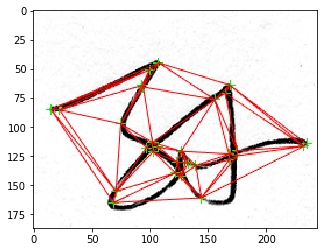

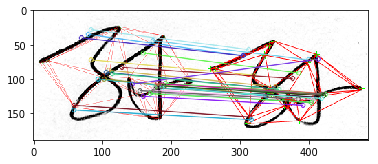

(<matplotlib.image.AxesImage at 0x19136fe5f60>, None)

In [19]:
import os
import numpy as np
import cv2 
from matplotlib import pyplot as plt
import scipy.io as sio
import sys
import platform


input3 = "del_ch_16_013.PNG"
input4 = "del_ch_17_013.PNG"


input1 = "ch_16_013.PNG"
input2 = "ch_17_013.PNG"

# Initiate FAST detector
#Remember in case of using FAST method, you can only find the keypoints but you dont have any detector. 
def apply_FAST(source):
    #here fast is only used for detecting the keypoints but later on BRIEF will be used for the 
    img = cv2.imread(source,0)     
    # find the keypoints and descriptors with SIFT
    #kp1, des1 = orb.detectAndCompute(img1,None)
    #kp2, des2 = orb.detectAndCompute(img2,None)
    
    
    # Initiate FAST extractor
    fast = cv2.FastFeatureDetector_create()
    kp = fast.detect(img,None)

    # Initiate BRIEF extractor
    brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()
    kp1, des1 = brief.compute(img, kp)
    return kp1, des1


def files(path):  
    for file in os.listdir(path):
        if os.path.isfile(os.path.join(path, file)):
            yield file

            
#Threshold for limiting the number of features in the images.            
           
#for file in files("."):
   # if "gen" in file:
    #    print (file)
     #   k, d = apply_ORB(file)
        #print (k)
        #print(d)
        
#main() starts from here
print(sys.version)
platform.python_version()
number_of_matches = 20;       
k1, d1 = apply_FAST(input1)
k2, d2 = apply_FAST(input2)

print("Feature Lengths", len(k1), len(k2))

# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=False)
# Match descriptors.
#matches = bf.match(d1,d2)
matches = bf.knnMatch(d1,d2, k=2)
# Sort them in the order of their distance.
#matches = sorted(matches, key = lambda x:x.distance)




# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.65 * n.distance:
        good.append([m])


print("Good Length: ", len(good))



img1 = cv2.imread(input3)
img2 = cv2.imread(input4)
#img3 = cv2.drawMatches(img1,k1,img2,k2, matches[:number_of_matches] ,None, flags=2)
img3 = cv2.drawMatchesKnn(img1,k1,img2,k2,good,None, flags=2)
plt.imshow(img1), plt.show()
plt.imshow(img2), plt.show()
plt.imshow(img3),plt.show()
